In [6]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [8]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
778    NaN  565.27               30.3                25.6                 8.5   
779    NaN  288.26               31.3                25.8                 8.8   
780    NaN  535.08               29.5                24.7                 8.0   
781    NaN  496.08               29.8                26.1                 8.0   
782    NaN  551.01               31.7                27.2                 8.5   
783    NaN  631.18               31.0                26.2                 8.0   
784    NaN  517.06               29.7                25.2                 7.9   
785    NaN  476.32               29.3                24.7                 7.8   
786    NaN  512.54               29.0                24.2                 7.8   
787    NaN  480.88               28.2                23.7                 7.6   

     altura  espessura  
778     9.4        3.0  
779     9.9        3.1  
780     9.0        3.0  
781     

In [9]:
# Dropping the columns
df2 = df.drop(columns=[
'Index',
'espessura'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [10]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso')
best_model = exp2.compare_models()

,Description,Value
0,Session id,5264
1,Target,peso
2,Target type,Regression
3,Original data shape,"(788, 5)"
4,Transformed data shape,"(788, 5)"
5,Transformed train set shape,"(551, 5)"
6,Transformed test set shape,"(237, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.7763,778.5332,26.4425,0.9654,0.0852,0.0628,0.1830
gbr,Gradient Boosting Regressor,14.7281,783.1584,26.3567,0.9653,0.0854,0.0629,0.0850
rf,Random Forest Regressor,14.7777,785.3597,26.2318,0.9650,0.0842,0.0623,0.1670
knn,K Neighbors Regressor,14.8756,799.1269,26.5284,0.9643,0.0955,0.0625,0.0330
et,Extra Trees Regressor,14.7340,806.3914,26.5620,0.9640,0.0849,0.0621,0.1430
ada,AdaBoost Regressor,21.0745,978.7481,30.1173,0.9575,0.2035,0.1636,0.0650
xgboost,Extreme Gradient Boosting,17.0515,1004.3475,30.1802,0.9556,0.0981,0.0719,0.1530
dt,Decision Tree Regressor,19.3983,1188.5424,33.0570,0.9487,0.1180,0.0812,0.0230
lasso,Lasso Regression,29.4716,1466.3635,37.9791,0.9384,0.6956,0.2663,0.0240
llar,Lasso Least Angle Regression,29.4749,1468.0956,37.9996,0.9383,0.6996,0.2663,0.0230


In [11]:
rf = exp2.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.2180,808.8984,28.4411,0.9701,0.0985,0.0678
1,12.7262,400.7163,20.0179,0.9826,0.0735,0.0606
2,14.4679,448.8126,21.1852,0.9837,0.0730,0.0614
3,17.9688,2112.2588,45.9593,0.8998,0.1176,0.0701
4,12.5253,469.7851,21.6745,0.9828,0.0770,0.0572
5,15.8827,569.4461,23.8631,0.9761,0.0789,0.0645
6,13.2904,424.4673,20.6026,0.9864,0.0604,0.0503
7,10.8652,353.7325,18.8078,0.9847,0.0680,0.0526
8,15.5744,532.0866,23.0670,0.9783,0.0811,0.0677


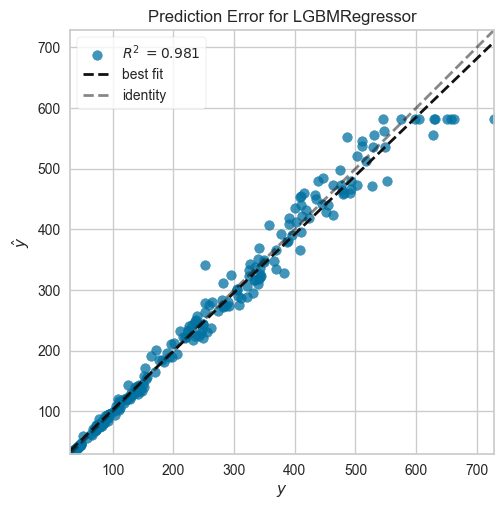

In [12]:
exp2.plot_model(rf, plot = 'error')

In [13]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
623,25.000000,20.799999,6.8,7.9,342.299988,321.666610
420,22.100000,18.700001,6.0,6.9,235.399994,245.398336
783,31.000000,26.200001,8.0,9.4,631.179993,581.343600
756,30.500000,26.000000,8.5,9.5,630.130005,581.343600
725,29.799999,25.600000,8.0,8.8,486.079987,552.024682


In [21]:
peso_pred_semEspe.tail(10)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
772,29.799999,25.799999,7.6,8.0,473.940002,497.409027
548,23.500000,19.500000,5.8,7.2,280.100006,283.284666
283,17.000000,14.600000,4.8,5.2,109.540001,102.668650
700,27.799999,22.500000,7.5,8.8,414.500000,459.979144
351,18.799999,16.100000,5.1,5.4,144.789993,134.172678
623,25.000000,20.799999,6.8,7.9,342.299988,321.666610
420,22.100000,18.700001,6.0,6.9,235.399994,245.398336
783,31.000000,26.200001,8.0,9.4,631.179993,581.343600
756,30.500000,26.000000,8.5,9.5,630.130005,581.343600
725,29.799999,25.600000,8.0,8.8,486.079987,552.024682


In [20]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
65,13.200000,11.100000,3.3,4.0,40.840000,41.461444
189,15.500000,13.500000,4.2,4.5,73.339996,76.871567
784,29.700001,25.200001,7.9,8.6,517.059998,513.095953
390,20.799999,18.000000,6.0,6.8,216.149994,223.008356
157,16.299999,14.200000,4.2,4.7,85.559998,88.233228
...,...,...,...,...,...,...
772,29.799999,25.799999,7.6,8.0,473.940002,497.409027
548,23.500000,19.500000,5.8,7.2,280.100006,283.284666
283,17.000000,14.600000,4.8,5.2,109.540001,102.668650
700,27.799999,22.500000,7.5,8.8,414.500000,459.979144


# Continuidade do Modelo

In [10]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [11]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [12]:
exp2.predict_model(saved_rf)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,peso,prediction_label
502,23.500000,20.900000,6.4,8.0,326.980011,301.370901
335,19.200001,16.500000,5.5,5.8,155.100006,156.386305
249,18.799999,16.299999,5.0,5.5,140.460007,139.332205
170,16.200001,13.800000,4.4,5.0,87.370003,89.491601
459,23.100000,19.799999,6.1,7.5,268.029999,275.670200
...,...,...,...,...,...,...
213,17.000000,14.500000,4.5,4.9,93.430000,94.258500
43,12.400000,10.200000,3.1,3.7,37.549999,34.802700
580,22.400000,19.000000,6.0,7.0,234.309998,245.634699
247,17.200001,14.600000,4.8,5.3,111.919998,109.689898


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)